# Regularization and Variable Selection in linear models (Shrinkage Methods)

### LASSO, Ridge and Elastic Net


### Ridge
Ridge uses a tunable parameter that is used to minimized the coefficients as low as possible using this equation.

RSS(residual  sum  of  squares) $+ \lambda \sum_{j=1}^{p} \beta_j^2$

$\lambda  is \leq 0$ In this case ridge coefficients are adjusted to fit the data well but there is no really reduction of coefficients unless there contribution to the model is almost 0. Similar to the least squares technique for linear model ridge tries to minimize the RSS but it adds and adittional paramenter called the shrinkage penalty and this tends to reduce the coefficients toward zero.

### LASSO
LASSO relies open the linear model to reduce features using an alternative fitting procedure for estimating the coefficients. This procedure is more restrictive and reduce the coefficients that do not contribute to the model to 0.

It also uses a tunable parameter $\lambda$

$$RSS + \lambda \sum_{j=1}^{p} |\beta_j|$$

LASSO uses an L1 penalty instead of an L2. as mentioned before the shrinkage penalty in lasso tends to recude some variables to zero, if they have very low coefficients to beging with.

### Elastic Net

As we will explore next, LASSO present problems whit highly correlated datasets or high dimensional data where LASSO tends to select one variable from a group and ignore the others. Elastic net overcomes this difficulties by addind a quadratic term to the shrinkage penalty 

$$RSS + \lambda \sum_{j=1}^{p} |\beta_j|^2$$

![title](Bias_variance.png)

We will follow the tutorial from [https://www4.stat.ncsu.edu/~post/josh/LASSO_Ridge_Elastic_Net_-_Examples.html](https://www4.stat.ncsu.edu/~post/josh/LASSO_Ridge_Elastic_Net_-_Examples.html). That gives a very good explanation to the differences and strenghts to the three different methods for variable selection.

In the first section we will simulate data taken from a normal distribution, where there is very small signal and lots of noise.

In [1]:
library(MASS)  # Package needed to generate correlated precictors
library(glmnet)  # Package to fit ridge/lasso/elastic net models

Loading required package: Matrix

Loaded glmnet 4.1-1



In [2]:
# Generate data
set.seed(19875)  # Set seed for reproducibility
n <- 1000  # Number of observations
p <- 5000  # Number of predictors included in model
real_p <- 15  # Number of true predictors
x <- matrix(rnorm(n*p), nrow=n, ncol=p)
y <- apply(x[,1:real_p], 1, sum) + rnorm(n)

# Split data into train (2/3) and test (1/3) sets
train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]

In [3]:
head(x)


1.0158064,-2.1233216,1.1109087,0.48810771,0.4510301,1.72496031,0.1444734,-0.30811700,-0.04698793,-1.25381907,...,0.1980665,0.2489703,-0.1150974,-0.7069987,0.60524684,0.395003002,-0.8400175,0.79860539,0.9549130,1.34037406
-1.9134587,0.3385125,-0.5879818,-0.04468573,1.8965145,0.05888253,-1.8126959,0.09771311,-0.55916953,-0.19408463,...,-0.2835207,0.5071261,0.9136516,-1.0876121,-1.81720785,-1.107487856,0.3704898,-0.95554498,-0.4395614,0.09095082
2.2498462,-0.9709378,0.3564133,-1.18759018,0.7966766,1.63718697,0.1213689,0.06479325,-0.66972236,0.68715724,...,-2.2204721,0.4550765,-0.8247341,-0.3502451,-0.60710861,2.089378425,-0.3950637,0.94654640,-1.4759874,0.03501103
1.7924403,-0.2356649,1.3223368,-0.20971424,0.6269838,-2.02410698,1.8545330,-1.37945300,1.01335403,-0.42288539,...,0.4692550,-0.4250710,0.3316593,1.8953527,0.08096607,1.695944200,-0.7763419,-1.30906450,1.7334954,0.51327545
0.2764585,-1.3816672,1.4950893,-0.86565965,0.3600757,1.45172395,-0.7207944,-0.63215070,-0.96786327,-0.06999146,...,-0.8970582,-1.3451329,-1.4163426,2.2047781,0.74774184,-0.004327117,-0.6421672,-0.20819750,-0.4524946,0.37164163
-0.8304207,-0.3464086,2.1143309,1.39869613,0.6596009,0.14537704,-0.6916929,0.18702489,0.23469795,1.06186656,...,1.9223166,-0.2258022,-1.6019665,0.6099615,0.71633968,-0.436958332,0.9399259,-0.04225441,0.6925121,-2.06390386


In [4]:
# Fit models 
# (For plots on left):
fit.lasso <- glmnet(x.train, y.train, family="gaussian", alpha=1)
fit.ridge <- glmnet(x.train, y.train, family="gaussian", alpha=0)
fit.elnet <- glmnet(x.train, y.train, family="gaussian", alpha=.5)


In [5]:
# 10-fold Cross validation for each alpha = 0, 0.1, ... , 0.9, 1.0
# (For plots on Right)
for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(x.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="gaussian"))
}

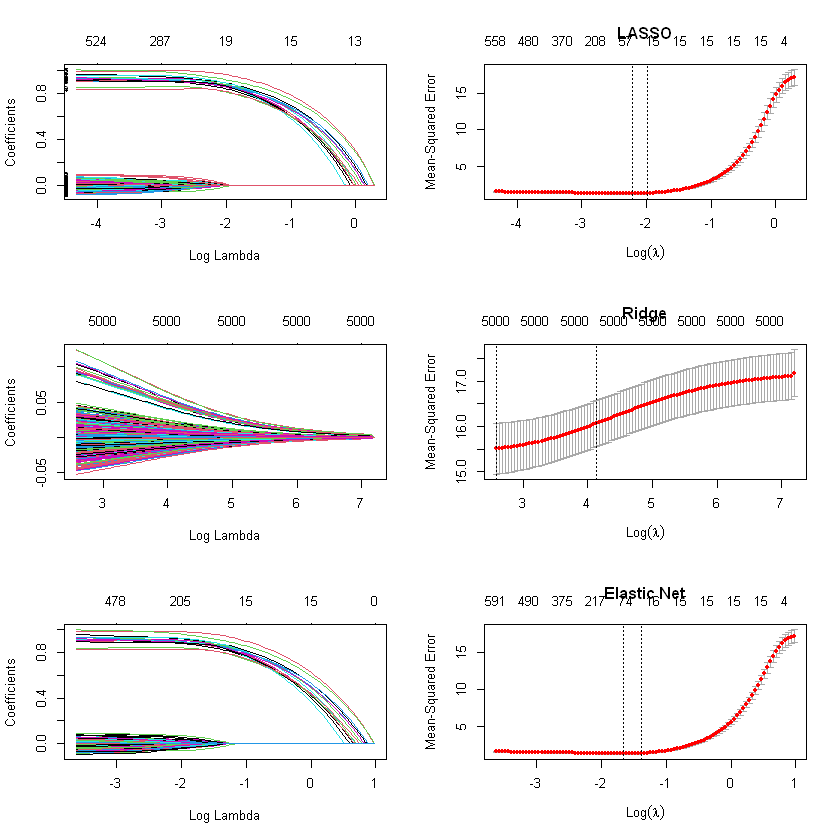

In [6]:
# Plot solution paths:
par(mfrow=c(3,2))
# For plotting options, type '?plot.glmnet' in R console
plot(fit.lasso, xvar="lambda",label=TRUE)
plot(fit10, main="LASSO")

plot(fit.ridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(fit.elnet, xvar="lambda")
plot(fit5, main="Elastic Net")

In [7]:
#MSE on test set
yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
yhat1 <- predict(fit1, s=fit1$lambda.1se, newx=x.test)
yhat2 <- predict(fit2, s=fit2$lambda.1se, newx=x.test)
yhat3 <- predict(fit3, s=fit3$lambda.1se, newx=x.test)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=x.test)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
yhat6 <- predict(fit6, s=fit6$lambda.1se, newx=x.test)
yhat7 <- predict(fit7, s=fit7$lambda.1se, newx=x.test)
yhat8 <- predict(fit8, s=fit8$lambda.1se, newx=x.test)
yhat9 <- predict(fit9, s=fit9$lambda.1se, newx=x.test)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.test)

mse0 <- mean((y.test - yhat0)^2)
mse1 <- mean((y.test - yhat1)^2)
mse2 <- mean((y.test - yhat2)^2)
mse3 <- mean((y.test - yhat3)^2)
mse4 <- mean((y.test - yhat4)^2)
mse5 <- mean((y.test - yhat5)^2)
mse6 <- mean((y.test - yhat6)^2)
mse7 <- mean((y.test - yhat7)^2)
mse8 <- mean((y.test - yhat8)^2)
mse9 <- mean((y.test - yhat9)^2)
mse10 <- mean((y.test - yhat10)^2)

mse0 ##Ridge
mse2
mse4
mse8
mse10 ##Lasso

[1] 15.28516

[1] 1.634704

[1] 1.482577

[1] 1.356241

[1] 1.352912

In [8]:
lambda_cv_Ridge <- min(fit.ridge$lambda)
lambda_cv_Lasso <- min(fit.lasso$lambda)
lambda_cv_Elnet <- min(fit.elnet$lambda)
lambda_cv_Ridge
lambda_cv_Lasso
lambda_cv_Elnet

[1] 13.39774

[1] 0.01339774

[1] 0.02679548

AIC is an out of sample estimator that can be used to evaluate the quality of the model. low values of AIC equate better models. BIC is implemented similarly than AIC but it differs in the penalty given from the number of paramenters where AIC uses 2k (where k is the number of paramenters from the model) and BIC uses a penaly of ln(n)k

![title](AIC.png)

More information at [https://towardsdatascience.com/introduction-to-aic-akaike-information-criterion-9c9ba1c96ced](https://towardsdatascience.com/introduction-to-aic-akaike-information-criterion-9c9ba1c96ced)

In [9]:
##Find best AIC/BIC for each model
##Ridge
tLL <- fit.ridge$nulldev - deviance(fit.ridge) ##Likelihood of the model
k <- fit.ridge$df ##Number of parameters
n <- fit.ridge$nobs ##Sample Size

##AIC

AICc <- -tLL+2*k+2*k*(k+1)/(n-k-1)
min(AICc)##Best AIC
best_AIC = match(c(min(AICc)),AICc)##Which index is this?
print(paste("Lambda from AIC Ridge = ",fit.ridge$lambda[best_AIC]))##Find this lambda

##BIC
BIC<-log(n)*k - tLL 
min(BIC)##Best BIC
best_BIC = match(c(min(BIC)),BIC)##Which index is this?
print(paste("Lambda from BIC Ridge = ",fit.ridge$lambda[best_BIC]))

##Lasso
##AIC
tLL <- fit.lasso$nulldev - deviance(fit.lasso)
k <- fit.lasso$df
n <- fit.lasso$nobs
AICc_lasso <- -tLL+2*k+2*k*(k+1)/(n-k-1)
min(AICc_lasso)##Best AIC
best_AIC_lasso = match(c(min(AICc_lasso)),AICc_lasso)##Which index is this?
print(paste("Lambda from AIC Lasso = ",fit.lasso$lambda[best_AIC_lasso]))##Find this lambda

##BIC
BIC_lasso<-log(n)*k - tLL 
min(BIC_lasso)##Best BIC
best_BIC_lasso = match(c(min(BIC_lasso)),BIC_lasso)##Which index is this?
print(paste("Lambda from BIC Lasso= ",fit.lasso$lambda[best_BIC_lasso]))


yLassoAIC <- predict(fit10, s=fit.lasso$lambda[best_AIC_lasso], newx=x.test)
mseLassoAIC <- mean((y.test - yLassoAIC)^2)
print(paste("mse Lasso AIC = ",mseLassoAIC)) ##1.27423633930938 Best model so far

yLassoBIC <- predict(fit10, s=fit.lasso$lambda[best_BIC_lasso], newx=x.test)
mseLassoBIC <- mean((y.test - yLassoBIC)^2)
print(paste("mse Lasso BIC = ",mseLassoBIC)) ##1.31752470484621 Still better but not best

##Elastic Net
##AIC
tLL <- fit.elnet$nulldev - deviance(fit.elnet)
k <- fit.elnet$df
n <- fit.elnet$nobs
AICc_elnet <- -tLL+2*k+2*k*(k+1)/(n-k-1)
min(AICc_elnet)##Best AIC
best_AIC_elnet = match(c(min(AICc_elnet)),AICc_elnet)##Which index is this?
print(paste("Lambda AIC enet =",fit.elnet$lambda[best_AIC_elnet]))##Find this lambda

##BIC
BIC_elnet<-log(n)*k - tLL 
min(BIC_elnet)##Best BIC
best_BIC_elnet = match(c(min(BIC_elnet)),BIC_elnet)##Which index is this?
fit.elnet$lambda[best_BIC_elnet]

yelnetAIC <- predict(fit5, s=fit.elnet$lambda[best_BIC_elnet], newx=x.test)
mseelnetAIC <- mean((y.test - yelnetAIC)^2)
print(paste("mse elnet = ",mseelnetAIC))

[1] -11830.7

[1] "Lambda from AIC Ridge =  13.3977392066094"


[1] 22150.88

[1] "Lambda from BIC Ridge =  13.3977392066094"


[1] -10554.23

[1] "Lambda from AIC Lasso =  0.0990189661692623"


[1] -10438.96

[1] "Lambda from BIC Lasso=  0.1249477639877"
[1] "mse Lasso AIC =  1.27423633930938"
[1] "mse Lasso BIC =  1.31752470484621"


[1] -10487.92

[1] "Lambda AIC enet = 0.207467657558744"


[1] -10340.33

[1] 0.2617945

[1] "mse elnet =  1.42929645042112"


### LASSO is the winner! LASSO is good at picking up a small signal through lots of noise.

In the folowing tutorial, the authors demonstrate the use of lasso in the logistic regresion. 

In this cases we will be transforming the continuous outcome to discrete, and the evaluation to the model will rely on the constrast differences between the categorical predictors. 

https://eight2late.wordpress.com/2017/07/11/a-gentle-introduction-to-logistic-regression-and-lasso-regularisation-using-r/